# There is a problem 😧😧😧😧😧😧
# What is it ?????? & What we should dooo??? 





* Inputs:
the input data representing the outcome of dating session according to there profiles.
it contains of 191 features that represent each dating session
The dataset has a lot of missing values which  we need to be processed
*Outputs:
the output is the probability (0-1, float) that the dating session will lead to a successful match. 
* Data mining:
requires classification (as we predict match according to the features){ Generalization and Summarization,Association and Correlation,Clustering,Outlier/Anomaly Analysis,Classification & Prediction,Time and Ordering ,Structure and Network Analysis}
* We will face some challenges as the null(missing)values, the duplications of the rows, some features that does not affect the target, the missclassification between data and of course it will need some feature selection 
* The impact: of  is that it can help businesses understand their customer
baseline and try to meet customer requirements and satisfication
* I think we may Fill the missing data with true value according to the result of hyperparamter tuning and the columns with large amout of data we should do one of the 2 options:
1. drop the column if it does not affect our model
2. to return to the customer and he will fill it

# Experimental Protocol:
we used Random search, grid search and baysien search to get the best hyperparameter to be able to use (our models :Random forest, XGBClassifier) to measure the auc/roc

#What preprocessing:
1. view the data and understand it
2. using df.info() to get more insight about the data
3. check the missing data using df.isna().sum()
4. convert all object columns to categorical column
5. extracting numeric features and categorical features
6. check the imbalancing and solve it
7. define a pipeline for numeric feature preprocessing and apply StandardScaler 
8. define a pipeline for categorical feature preprocessing and apply OneHotEncoder
9. using hyperparameter tuning, try to find:
10. we did all of that to fill the missing data

In [ ]:
import numpy as np 
import pandas as pd

# First, we will upload the train and test data (as usual 🤪🤪🤪🤪🤪🤪)

In [ ]:
train_data=pd.read_csv('train.csv')
train_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [ ]:
test_data=pd.read_csv('test.csv')
test_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


# We will print somethings to help us to understand the data more and more
 

*   Shape
*   Size
*   Information about the data (as data type, entire columns,....etc)
*   The duplications in the data (if there is 2 rows with the same values)
*   The null values (which is the main thing to put in your mind 😈😈😈😈😈)



In [ ]:
train_data.shape

(5909, 192)

In [ ]:
test_data.shape

(2469, 191)

In [ ]:
train_data.size

1134528

In [ ]:
test_data.size

471579

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Columns: 191 entries, gender to id
dtypes: float64(173), int64(10), object(8)
memory usage: 3.6+ MB


In [ ]:
train_data.duplicated().sum() 

0

In [ ]:
test_data.duplicated().sum() 

0

# Unfortunately, we found many nulls------->Oooooooops 😞😞😞😞😞😞😞


We need to solve them as the model can not take nulls and also can not predict in the presence of the nulls

In [ ]:
train_data.isna().sum() 

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

In [ ]:
test_data.isna().sum() 

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     1866
intel5_3    1866
fun5_3      1866
amb5_3      1866
id             0
Length: 191, dtype: int64

In [ ]:
train_data2=train_data.copy()# we will take just a copy

# Now, we decided to get our data :

*   Integer
*   Float
*   Objest

and store them in variables to be able to use them later
We will see later why we did it 




In [ ]:
col_int = train_data2.select_dtypes('int64')#integer
col_int

,gender,idg,condtn,wave,round,position,order,partner,match,samerace,id
0,0,3,2,14,18,2,14,12,0,0,2583
1,1,14,1,3,10,2,8,8,0,0,6830
2,1,14,1,13,10,8,10,10,0,0,4840
3,1,38,2,9,20,18,6,7,0,1,5508
4,1,24,2,14,20,6,20,17,0,0,4828
...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,18,1,0,1,3390
5905,1,24,2,9,20,19,5,6,0,0,4130
5906,0,13,2,11,21,5,3,18,0,0,1178
5907,1,10,2,7,16,6,9,10,1,0,5016


In [ ]:
col_float = train_data2.select_dtypes('float64')#float
col_float

,positin1,pid,int_corr,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,2.0,372.0,-0.03,27.0,2.0,30.00,15.00,15.00,20.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,63.0,0.21,24.0,4.0,5.00,15.00,45.00,25.00,0.00,...,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
2,8.0,331.0,0.43,34.0,2.0,15.00,15.00,10.00,25.00,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.0,200.0,0.72,25.0,2.0,13.21,18.87,18.87,16.98,16.98,...,8.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
4,6.0,357.0,0.33,27.0,4.0,15.00,20.00,20.00,20.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,2.0,214.0,-0.22,23.0,2.0,17.02,21.28,17.02,21.28,14.89,...,12.0,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN
5905,15.0,199.0,0.08,30.0,2.0,17.50,17.50,20.00,12.50,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5906,5.0,290.0,0.35,34.0,2.0,30.00,10.00,30.00,10.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5907,14.0,151.0,0.45,28.0,2.0,14.55,16.36,18.18,18.18,16.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_object = train_data2.select_dtypes('object')#object
col_object

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
5904,Clinical Psychology,NaN,NaN,NaN,New York,"11,803","65,708.00",Psychologist
5905,MBA,NaN,NaN,NaN,Colombia,NaN,NaN,Consulting
5906,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,"98,115","37,881.00",Teacher
5907,Biochemistry,NaN,NaN,NaN,Canada,NaN,NaN,pharmaceuticals and biotechnology


# Here, we just convert our object to Categories ♥♥♥♥♥♥

In [ ]:
m=['field','undergra','mn_sat','tuition','from','zipcode','income','career']
for i in m:
  train_data2[i] = train_data2[i].astype('category')

In [ ]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: category(8), float64(173), int64(11)
memory usage: 8.5 MB


We just seperate the data to x & y

In [ ]:
y = train_data2['match']
x = train_data2.drop(['match','id'],axis=1)
test_data2 = test_data.drop(columns = ['id'])

# we split the data to training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Here,we check the imbalancing of the data

<Axes: xlabel='index', ylabel='match'>

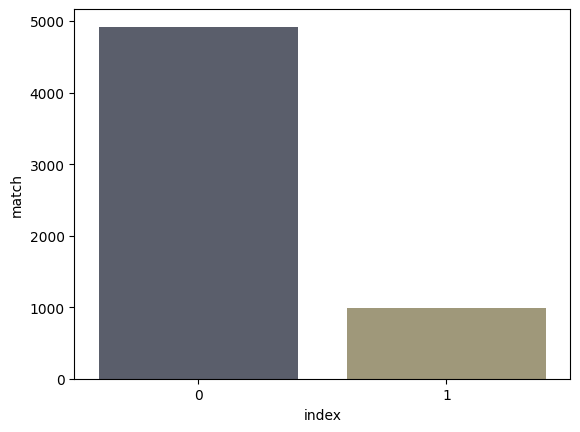

In [ ]:
import seaborn as sb
target_col=['match']
x1=train_data[target_col[0]].value_counts().reset_index()
sb.barplot ( x="index", y="match",data=x1, palette="cividis")

# Here, we will solve the problem of imbalancing using the RandomOverSampler function as we found a huge difference between the data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
     

# ran_sample Object from RandomOverSampler
ran_sample = RandomOverSampler(random_state=0)

#Apply the algorithm in data(X_train, y_train) 
x_train, y_train = ran_sample.fit_resample(x_train, y_train)

# Now, we use the data that we got it from the previos step to split them to catergorical and numeric(float & int) to be able to fill each null on them

In [ ]:
features_numeric = list(x_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(x_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sin

# Voilaaaaaaaaaaaaaa 🙂🙂🙂🙂🙂🙂🙂

We will apply the pipeline to make sequence to our code


1.   we replace each null in numeric values using imputer & standardized them
2.   we replace each null in the categorical values & convert them to one hot encoder
3. we transform the columns
4. finally, we aplly the model on them




We used RandomForestClassifier & XGBClassifier

In [ ]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install imblearn

     ------------------------------------ 226.0/226.0 kB 918.1 kB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 6.4 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scipy-1.5.2.dist-info\\METADATA'



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

full_pipline_RFC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)


# We will fit the pipeline of RandomForestClassifier  

In [ ]:
full_pipline_RFC = full_pipline_RFC.fit(x_train, y_train)
full_pipline_RFC.predict(x_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# We will fit the pipeline of XGBClassifier 

In [ ]:
full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
   

In [ ]:
full_pipeline = full_pipeline.fit(x_train, y_train)
full_pipeline.predict(x_val)

array([0, 0, 0, ..., 0, 0, 0])

we made a 4 pipelines:

1. define a pipe line for numeric feature preprocessing and apply on them standarization
2. define a pipe line for categorical feature preprocessing and apply one hot encoding
3. we but the categorical and numeric features in transformers to be able to path them to the model in the new pipeline
4. pipeline for randomforest classifier
5. pipeline for xgbclassifier


# Here, we apply the grid search on RandomForestClassifier to see the best hyper parameters ⌛⌛⌛⌛ (we try different values)

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_classifier__n_estimators': [15, 30, 40, 50],  
    'my_classifier__max_depth':[5, 10, 20, 30],
    'my_classifier__max_leaf_nodes': [10,20,50]       
}

# four-fold cross-validation
grid_search_RFC = GridSearchCV(
    full_pipline_RFC, param_grid, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_RFC.fit(x_train, y_train)

print('best score {}'.format(grid_search_RFC.best_score_))
print('best score {}'.format(grid_search_RFC.best_params_))

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   50.9s
[Parallel(n_jobs=2)]: Done 384 out of 384 | elapsed:  1.8min finished


best score 0.9222639719830731
best score {'my_classifier__max_depth': 20, 'my_classifier__max_leaf_nodes': 50, 'my_classifier__n_estimators': 50, 'preprocessor__num__imputer__strategy': 'mean'}


# Conclusion:
here, we apply grid search and it gives good accuracy with randomforest
we still do not know is it the best or not
we will apply another search and another model 

This is the prediction of the model on the test data

In [ ]:
grid_search_RFC.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = grid_search_RFC.predict_proba(test_data2)[:,1]

submission.to_csv('grid_search_RFC.csv', index=False)

Now, we will apply the grid search on XGBClassifier to get best classifier ⌛⌛⌛⌛ (we try different values)

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'my_classifier__n_estimators': [50, 100, 200,1000],  
    'my_classifier__max_depth':[2, 7, 10,50]       
}

# four-fold cross-validation
grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(x_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   44.6s
[Parallel(n_jobs=2)]: Done 192 out of 192 | elapsed:  8.2min finished


best score 0.9980576806820788
best score {'my_classifier__max_depth': 50, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'median'}


#Conclusion:
grid search with xgbclassifier has the best accuracy until now

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = grid_search.predict_proba(test_data2)[:,1]

submission.to_csv('grid_search_XGB.csv', index=False)

#Now, we will apply the random search on XGBClassifier to get best classifier ⌛⌛⌛⌛ (we try different values)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'my_classifier__n_estimators': [50, 100,1000],  
    'my_classifier__max_depth':[7, 10,30,100]       
}

# five-fold cross-validation
rand_search = RandomizedSearchCV(
    full_pipeline, param_grid, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

rand_search.fit(x_train, y_train)

print('best score {}'.format(rand_search.best_score_))
print('best score {}'.format(rand_search.best_params_))
     

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  6.4min finished


best score 0.9978236771289953
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 100, 'my_classifier__max_depth': 100}


#Conclusion:
xgbclassifier with randomsearch gives best accuracy
xgbclassifier still the best one 👏👏👏👏👏👏

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = rand_search.predict_proba(test_data2)[:,1]

submission.to_csv('rand_search_XGB.csv', index=False)

#Now, we will apply the random search on RandomForest to get best classifier ⌛⌛⌛⌛ (we try different values)

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_classifier__n_estimators': [15, 30, 40, 50],  
    'my_classifier__max_depth':[5, 10, 20, 30],
    'my_classifier__max_leaf_nodes': [10,20,50]       
}

# four-fold cross-validation
rand_search_RFC = RandomizedSearchCV(
    full_pipline_RFC, param_grid, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc')

rand_search_RFC.fit(x_train, y_train)

print('best score {}'.format(rand_search_RFC.best_score_))
print('best score {}'.format(rand_search_RFC.best_params_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


best score 0.9031425236080131
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 15, 'my_classifier__max_leaf_nodes': 50, 'my_classifier__max_depth': 20}


#Conclusion:
randomforest with randomsearch is good 
but xgbclassifier still the best
Bravoooooooooooooooooo xgbclassifier 👏👏👏👏👏👏👏👏👏👏

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = rand_search_RFC.predict_proba(test_data2)[:,1]

submission.to_csv('rand_search_RFC.csv', index=False)

#Now, we will apply the baysien search on RandomForest to get best classifier ⌛⌛⌛⌛ (we try different values)

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent','median'],
    'my_classifier__n_estimators': [20, 150, 40, 60,100],  
    'my_classifier__max_depth':[77, 10, 55, 30],
    'my_classifier__max_leaf_nodes': [100,20,50,200]       
}

# three-fold cross-validation
bayesian_search_RFC = BayesSearchCV(
    full_pipline_RFC, param, cv=3, n_iter=30, random_state=0, verbose=1, n_jobs=2, 
    scoring='roc_auc')

bayesian_search_RFC.fit(x_train, y_train)

print('best score {}'.format(bayesian_search_RFC.best_score_))
print('best score {}'.format(bayesian_search_RFC.best_params_))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
best score 0.9749358401597216
best score OrderedDict([('my_classifier__max_depth', 30), ('my_classifier__max_leaf_nodes', 200), ('my_classifier__n_estimators', 100), ('preprocessor__num__imputer__strategy', 'mean')])


#Conclusion:
randomforest with baysien is the best among alllll the previous randomforests 👏

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = bayesian_search_RFC.predict_proba(test_data2)[:,1]

submission.to_csv('bayesian_search_RFC.csv', index=False)

#Now, we will apply the baysien search on XGBClassifier to get best classifier ⌛⌛⌛⌛ (we try different values)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_classifier__n_estimators': [20, 35, 40, 60,100],  
    'my_classifier__max_depth':[7, 10, 55, 30],
    'my_classifier__max_leaf_nodes': [100,20,50]       
}

# three-fold cross-validation
bayes_search = BayesSearchCV(
    full_pipeline, param, cv=3, n_iter=30, random_state=0, verbose=1, n_jobs=2, 
    scoring='roc_auc')

bayes_search.fit(x_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

# Conclusion:
Xgbclassifier in baysien is the same as the previous Xgbclassifier

# The winner is the Xgbclassifier 👏👏👏👏👏👏👏👏👏👏👏


In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']

submission['match'] = bayes_search.predict_proba(test_data2)[:,1]

submission.to_csv('bayes_search.csv', index=False)

#Conclusion:
* we found that the best search that gives high value was grid search with XGBClassifier and fitted good(as it rounds on all the values)
* second was the random search with XGBClassifier 
* third was the baysien with XGBClassifier
* comes after them with Randomforest :gridsearch > randomsearch > baysien
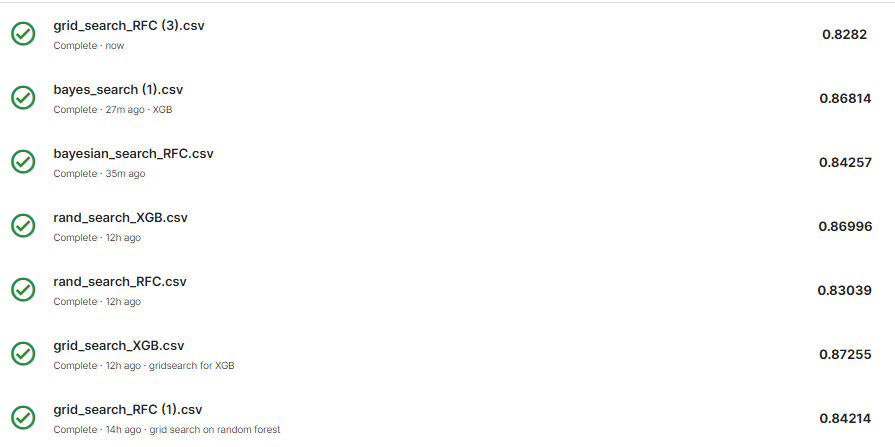


#🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

Linear Regression is used to handle regression problems, 
Linear regression provides a continuous output.

Logistic regression is used to handle the classification problems,
Logistic regression provides discret output(depends on the sum of the inputs and parameters).

but both are supervised.

[link text](https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output.)



#🌈What's a decision tree and how it is different to a logistic regression model?

Decision Trees are a non-parametric supervised algorithm, which used in classification and regression.
In decision tree ,no assumptions are made on the distribution of the data.
Logistic regression is a parametric model, in which the model is defined by having parameters ,while in logistic regression , assumptions are made on response variable, with Bernoulli or binomial distribution.
also the main difference between them is that decision trees bisect the space into smaller and smaller regions, where as logistic regression fits a single line to bisect the space

[link text](https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/#:~:text=Decision%20Trees%20bisect%20the%20space,generalize%20to%20planes%20and%20hyperplanes.)



#🌈What's the difference between grid search and random search?

Grid search looks to every possible combination of hyperparameters to find the best model, while random search selects random and tests a random combination of hyperparameters.
but both used to get best hyperparameter

[link text](https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html#:~:text=While%20grid%20search%20looks%20at,of%20conducting%20an%20exhaustive%20search.)

#🌈What's the difference between bayesian search and random search?

bayesien search: tune the algorithm to optimize its parameter in each round depended on the previous round score.
random search:it moves in random way of search, we just try part of the parameters.The parameter values are sampled from a given list or specified distribution(so it reaches the best hyperparameters fater than the other 2 methods).

[link text](https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399)

